In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# Link to Data Used = https://github.com/nytimes/covid-19-data
# Date Cloned = 2020-03-31

In [3]:
# Let's read in the US Data
# total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-3-31.csv.csv')
total_us_data = pd.read_csv('NYT-US-Data/us-states-2020-04-02.csv')

In [4]:
# Let's check for nulls
total_us_data.isnull().sum()

date      0
state     0
fips      0
cases     0
deaths    0
dtype: int64

In [5]:
# Let's check on the different states
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

### Separating the Data by State

In [6]:
# Let's make a funciton to seperate these
def state_info(state):
    data = total_us_data[total_us_data.state.str.contains(state)]
    data.date = pd.to_datetime(data.date)
    data = data.set_index(data.date)
    data['percent_change'] = data.cases.pct_change()
    data.percent_change.fillna(0, inplace=True)
    return data.drop(labels='date', axis=1)

In [7]:
# Function Test
northern_mariana_islands_data = state_info('Northern Mariana Islands')
northern_mariana_islands_data

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,state,fips,cases,deaths,percent_change
date,,,,,
2020-03-28,Northern Mariana Islands,69,2,0,0.0
2020-03-29,Northern Mariana Islands,69,2,0,0.0
2020-03-30,Northern Mariana Islands,69,2,0,0.0
2020-03-31,Northern Mariana Islands,69,2,0,0.0
2020-04-01,Northern Mariana Islands,69,6,1,2.0


In [8]:
# Don't know how to make a function to do this, so here we go
washington_data = state_info(total_us_data.state.unique()[0])
illinois_data = state_info(total_us_data.state.unique()[1])
california_data = state_info(total_us_data.state.unique()[2])
arizona_data = state_info(total_us_data.state.unique()[3])
massachusetts_data = state_info(total_us_data.state.unique()[4])
wisconsin_data = state_info(total_us_data.state.unique()[5])
texas_data = state_info(total_us_data.state.unique()[6])
nebraska_data = state_info(total_us_data.state.unique()[7])
utah_data = state_info(total_us_data.state.unique()[8])
oregon_data = state_info(total_us_data.state.unique()[9])
florida_data = state_info(total_us_data.state.unique()[10])
new_york_data = state_info(total_us_data.state.unique()[11])
rhode_island_data = state_info(total_us_data.state.unique()[12])
georgia_data = state_info(total_us_data.state.unique()[13])
new_hampshire_data = state_info(total_us_data.state.unique()[14])
north_carolina_data = state_info(total_us_data.state.unique()[15])
new_jersey_data = state_info(total_us_data.state.unique()[16])
colorado_data = state_info(total_us_data.state.unique()[17])
maryland_data = state_info(total_us_data.state.unique()[18])
nevada_data = state_info(total_us_data.state.unique()[19])
tennessee_data = state_info(total_us_data.state.unique()[20])
hawaii_data = state_info(total_us_data.state.unique()[21])
indiana_data = state_info(total_us_data.state.unique()[22])
kentucky_data = state_info(total_us_data.state.unique()[23])
minnesota_data = state_info(total_us_data.state.unique()[24])
oklahoma_data = state_info(total_us_data.state.unique()[25])
pennsylvania_data = state_info(total_us_data.state.unique()[26])
south_carolina_data = state_info(total_us_data.state.unique()[27])
dc_data = state_info(total_us_data.state.unique()[28])
kansas_data = state_info(total_us_data.state.unique()[29])
missouri_data = state_info(total_us_data.state.unique()[30])
vermont_data = state_info(total_us_data.state.unique()[31])
virginia_data = state_info(total_us_data.state.unique()[32])
connecticut_data = state_info(total_us_data.state.unique()[33])
iowa_data = state_info(total_us_data.state.unique()[34])
louisiana_data = state_info(total_us_data.state.unique()[35])
ohio_data = state_info(total_us_data.state.unique()[36])
michigan_data = state_info(total_us_data.state.unique()[37])
south_dakota_data = state_info(total_us_data.state.unique()[38])
arkansas_data = state_info(total_us_data.state.unique()[39])
delaware_data = state_info(total_us_data.state.unique()[40])
mississippi_data = state_info(total_us_data.state.unique()[41])
new_mexico_data = state_info(total_us_data.state.unique()[42])
north_dakota_data = state_info(total_us_data.state.unique()[43])
wyoming_data = state_info(total_us_data.state.unique()[44])
alaska_data = state_info(total_us_data.state.unique()[45])
maine_data = state_info(total_us_data.state.unique()[46])
alabama_data = state_info(total_us_data.state.unique()[47])
idaho_data = state_info(total_us_data.state.unique()[48])
montana_data = state_info(total_us_data.state.unique()[49])
puerto_rico_data = state_info(total_us_data.state.unique()[50])
virgin_islands_data = state_info(total_us_data.state.unique()[51])
guam_data = state_info(total_us_data.state.unique()[52])
west_virginia_data = state_info(total_us_data.state.unique()[53])
north_mariana_islands_data = state_info(total_us_data.state.unique()[54])

# EDA Time

In [9]:
# Before getting to the graphs, I want to touch on one point.
# I want to analyze the effect had by measures taken by varying states, to check if they slowed growth in a notable way.
# According to the WHO website, https://www.who.int/news-room/q-a-detail/q-a-coronaviruses,
# the incubation period for coronavirus is 1-14 day, but most commonly is 5 days.
# Despite the 5 day being the 'most' line, I think a full week is a reasonable delay.
# As such, I will be giving a 7 day delay to check for possible effects government measures.

In [10]:
# CNN has data on when stay at home orders were eneacted, and links to each state's information.
# https://www.cnn.com/2020/03/23/us/coronavirus-which-states-stay-at-home-order-trnd/index.html

In [11]:
# Since 1000 cases in a state has been Treated as a major is being treated as a milestone, let's make a formula to add that to the graphs
def thousand_case_milestone(state):
    plt.vlines(x=state[state.cases>1000][:1].index, ymin=0, ymax=1, linestyle=(0, (3, 5, 1, 5)), color='darkred', label="One Thousand Case Milestone")

### Washington State

C:\Users\nolan\AppData\Roaming\Python\Python37\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


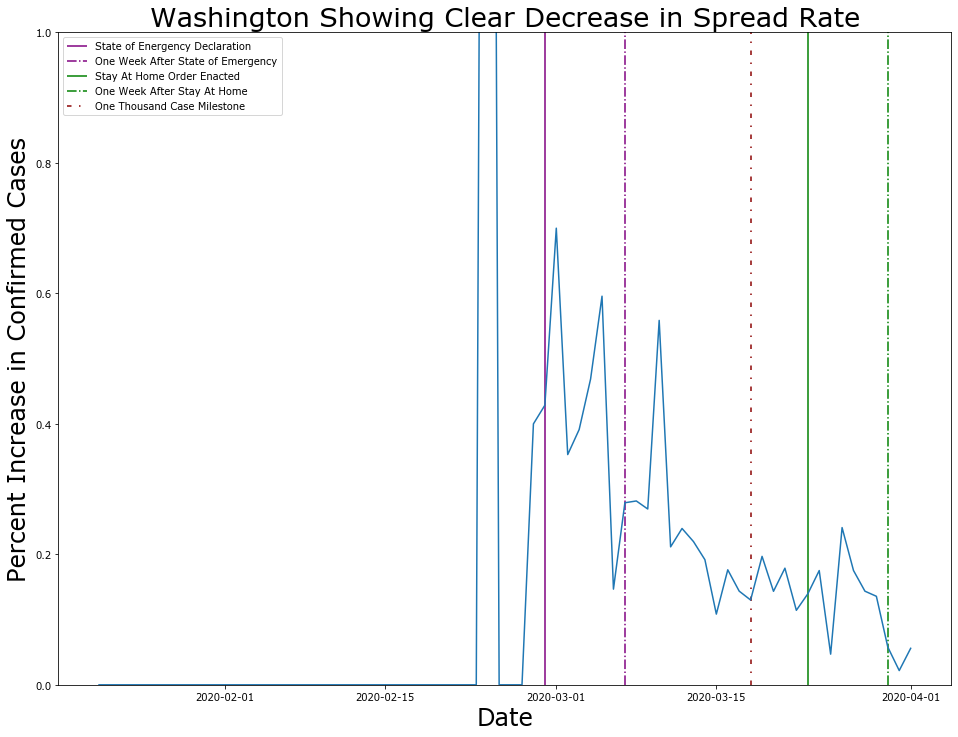

In [12]:
plt.figure(figsize=(16,12))
plt.title("Washington Showing Clear Decrease in Spread Rate", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.governor.wa.gov/news-media/inslee-issues-covid-19-emergency-proclamation
plt.vlines(x=dt.date(2020, 2, 29), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Energency Declaration')
plt.vlines(x=dt.date(2020, 3, 7), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://medium.com/wagovernor/inslee-announces-stay-home-stay-healthy-order-4891a7511f5e
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

thousand_case_milestone(washington_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(washington_data.percent_change)

plt.legend(loc='upper left');

### Illinois

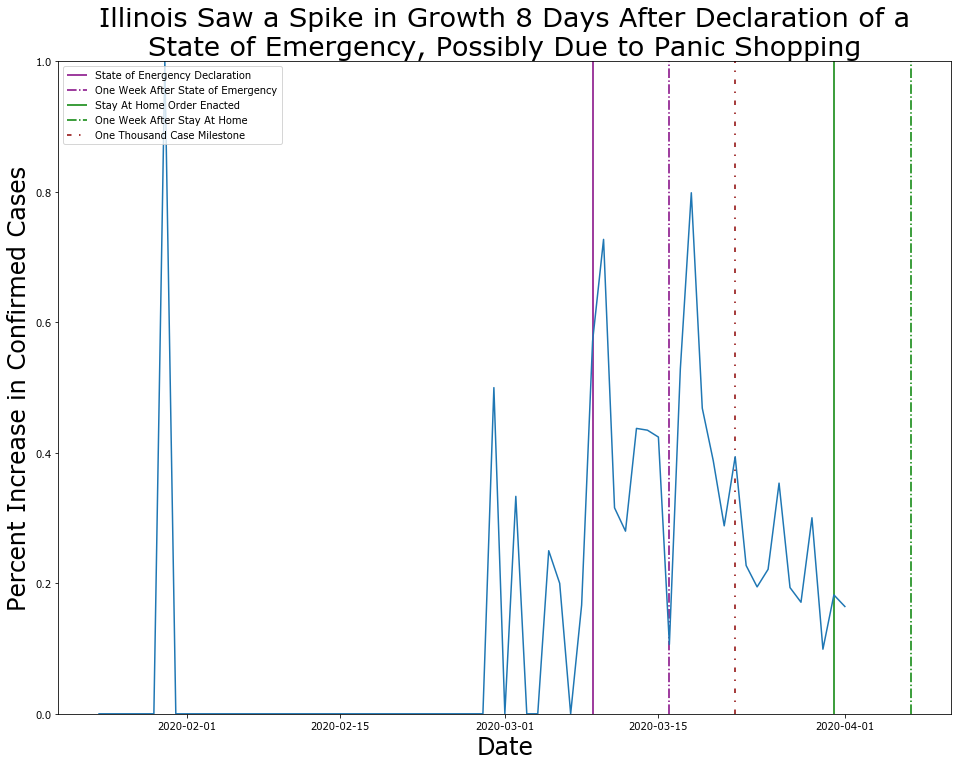

In [13]:
plt.figure(figsize=(16,12))
plt.title("Illinois Saw a Spike in Growth 8 Days After Declaration of a\nState of Emergency, Possibly Due to Panic Shopping", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://thesouthern.com/news/local/state-and-regional/illinois-governor-declares-state-of-emergency-due-to-covid-/article_5221117c-75e7-5609-97e2-b54a39e03473.html
plt.vlines(x=dt.date(2020, 3, 9), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Energency Declaration')
plt.vlines(x=dt.date(2020, 3, 16), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.illinoispolicy.org/pritzker-extends-illinois-stay-at-home-order-through-april-30/
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 7), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

thousand_case_milestone(illinois_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(illinois_data.percent_change)

plt.legend(loc='upper left');

### California

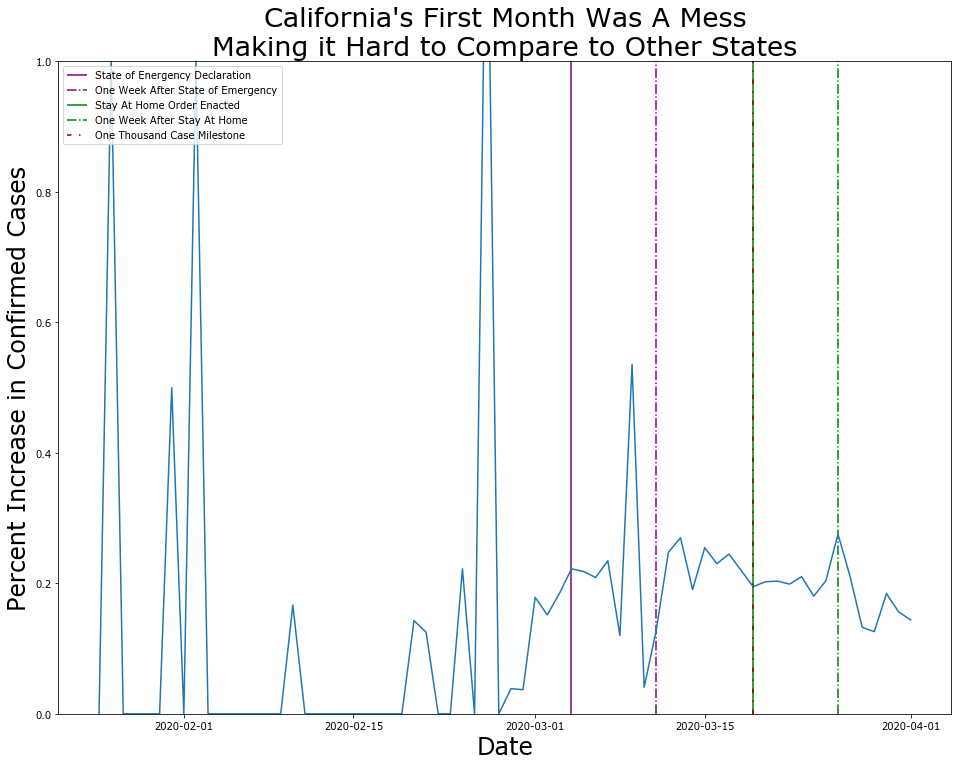

In [14]:
plt.figure(figsize=(16,12))
plt.title("California's First Month Was A Mess\nMaking it Hard to Compare to Other States", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.gov.ca.gov/2020/03/04/governor-newsom-declares-state-of-emergency-to-help-state-prepare-for-broader-spread-of-covid-19/
plt.vlines(x=dt.date(2020, 3, 4), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Energency Declaration')
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.natlawreview.com/article/covid-19-california-institutes-statewide-stay-home-order-to-combat-covid-19
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 26), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

thousand_case_milestone(california_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(california_data.percent_change)

plt.legend(loc='upper left');

### Arizona

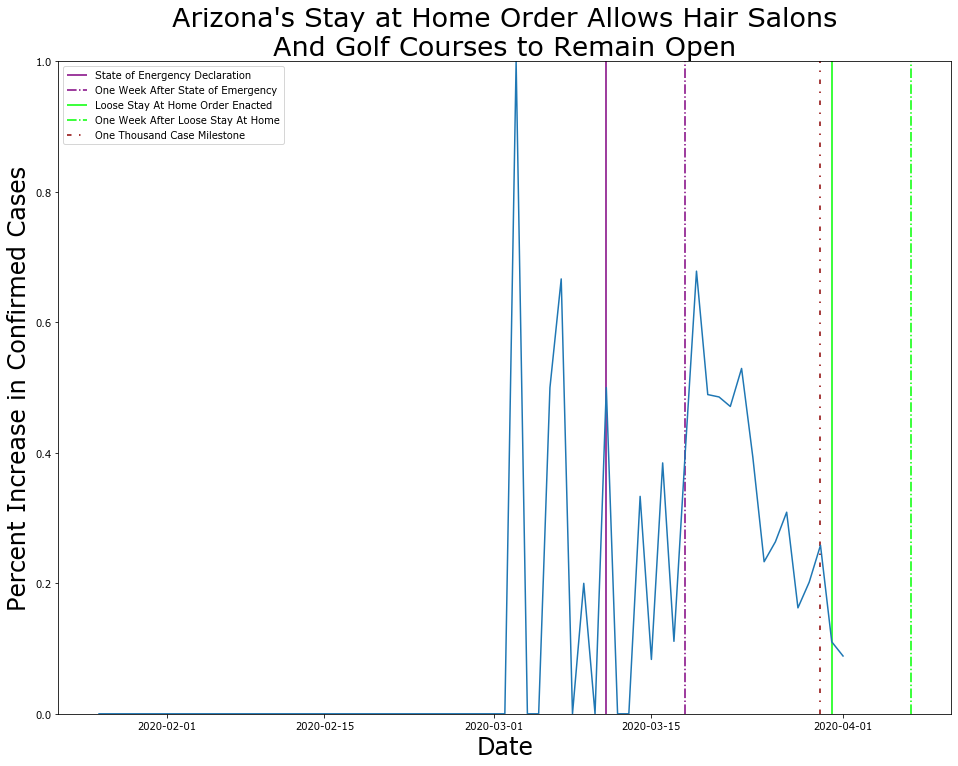

In [15]:
plt.figure(figsize=(16,12))
plt.title("Arizona's Stay at Home Order Allows Hair Salons\nAnd Golf Courses to Remain Open", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.azcentral.com/story/news/politics/arizona/2020/03/11/ducey-declares-health-emergency-arizona-new-coronavirus/5025505002/
plt.vlines(x=dt.date(2020, 3, 11), ymin=0, ymax=1, linestyles='solid', color='purple', label='State of Energency Declaration')
plt.vlines(x=dt.date(2020, 3, 18), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.nbcnews.com/news/us-news/arizona-mayors-slam-covid-19-stay-home-order-allows-hair-n1174186
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyles='solid', color='lime', label='Loose Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 7), ymin=0, ymax=1, linestyle='dashdot', color='lime', label='One Week After Loose Stay At Home')

thousand_case_milestone(arizona_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(arizona_data.percent_change)

plt.legend(loc='upper left');

### Massachusetts

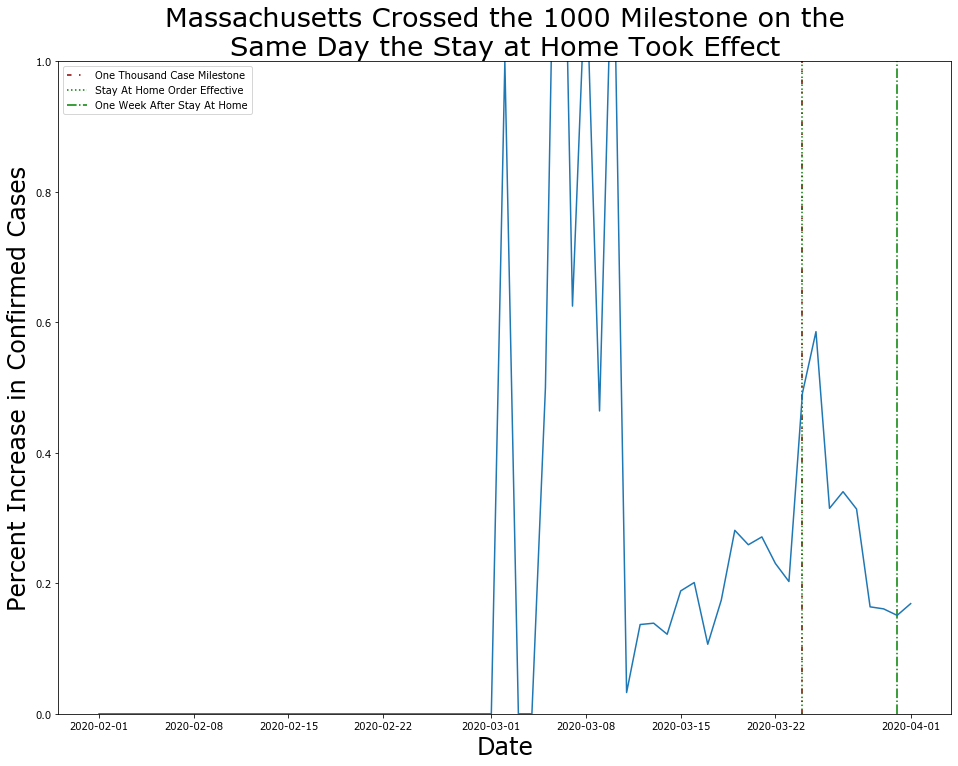

In [16]:
plt.figure(figsize=(16,12))
plt.title("Massachusetts Crossed the 1000 Milestone on the\nSame Day the Stay at Home Took Effect", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

thousand_case_milestone(massachusetts_data)
# https://www.mass.gov/news/governor-charlie-baker-orders-all-non-essential-businesses-to-cease-in-person-operation
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='dotted', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(massachusetts_data.percent_change)

plt.legend(loc='upper left');

### Wisconsin

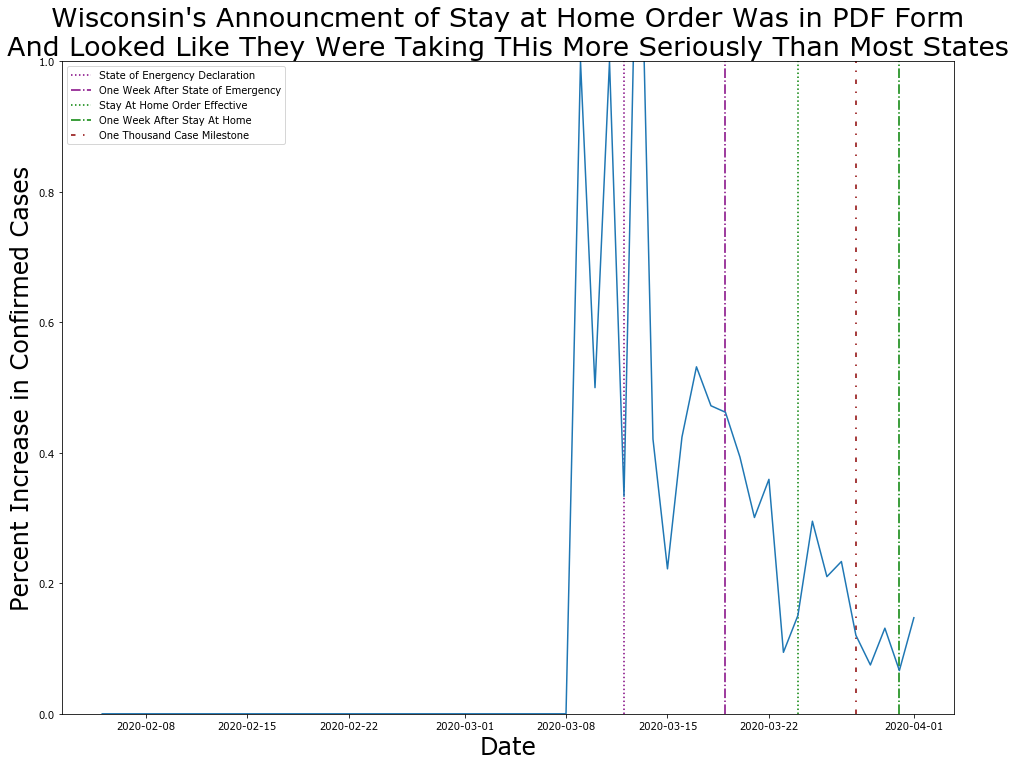

In [17]:
plt.figure(figsize=(16,12))
plt.title("Wisconsin's Announcment of Stay at Home Order Was in PDF Form\nAnd Looked Like They Were Taking THis More Seriously Than Most States", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://evers.wi.gov/Documents/COVID19/EMO12-SaferAtHome.pdf
plt.vlines(x=dt.date(2020, 3, 12), ymin=0, ymax=1, linestyles='dotted', color='purple', label='State of Energency Declaration')
plt.vlines(x=dt.date(2020, 3, 19), ymin=0, ymax=1, linestyle='dashdot', color='purple', label='One Week After State of Emergency')

# https://www.natlawreview.com/article/covid-19-von-briesen-task-force-resource-analysis-wisconsin-s-stay-home-order
plt.vlines(x=dt.date(2020, 3, 24), ymin=0, ymax=1, linestyles='dotted', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 31), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

thousand_case_milestone(wisconsin_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(wisconsin_data.percent_change)

plt.legend(loc='upper left');

In [18]:
total_us_data.state.unique()

array(['Washington', 'Illinois', 'California', 'Arizona', 'Massachusetts',
       'Wisconsin', 'Texas', 'Nebraska', 'Utah', 'Oregon', 'Florida',
       'New York', 'Rhode Island', 'Georgia', 'New Hampshire',
       'North Carolina', 'New Jersey', 'Colorado', 'Maryland', 'Nevada',
       'Tennessee', 'Hawaii', 'Indiana', 'Kentucky', 'Minnesota',
       'Oklahoma', 'Pennsylvania', 'South Carolina',
       'District of Columbia', 'Kansas', 'Missouri', 'Vermont',
       'Virginia', 'Connecticut', 'Iowa', 'Louisiana', 'Ohio', 'Michigan',
       'South Dakota', 'Arkansas', 'Delaware', 'Mississippi',
       'New Mexico', 'North Dakota', 'Wyoming', 'Alaska', 'Maine',
       'Alabama', 'Idaho', 'Montana', 'Puerto Rico', 'Virgin Islands',
       'Guam', 'West Virginia', 'Northern Mariana Islands'], dtype=object)

### Texas

No handles with labels found to put in legend.


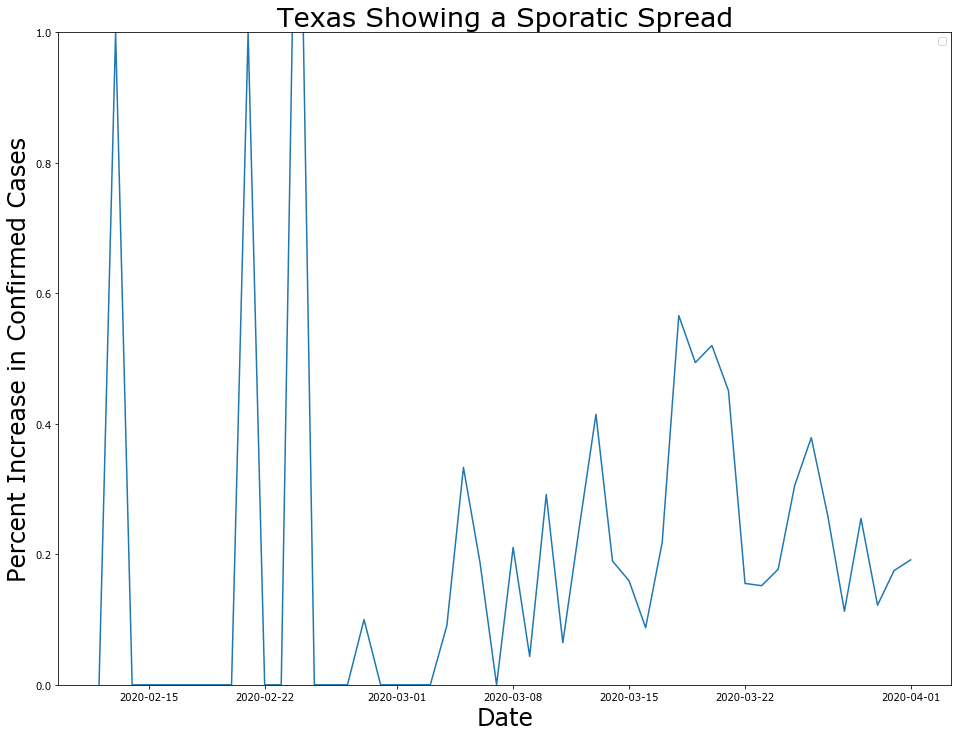

In [19]:
plt.figure(figsize=(16,12))
plt.title("Texas Showing a Sporatic Spread", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

plt.ylim(ymin=0, ymax=1)

plt.plot(texas_data.percent_change)

plt.legend();

### Louisiana

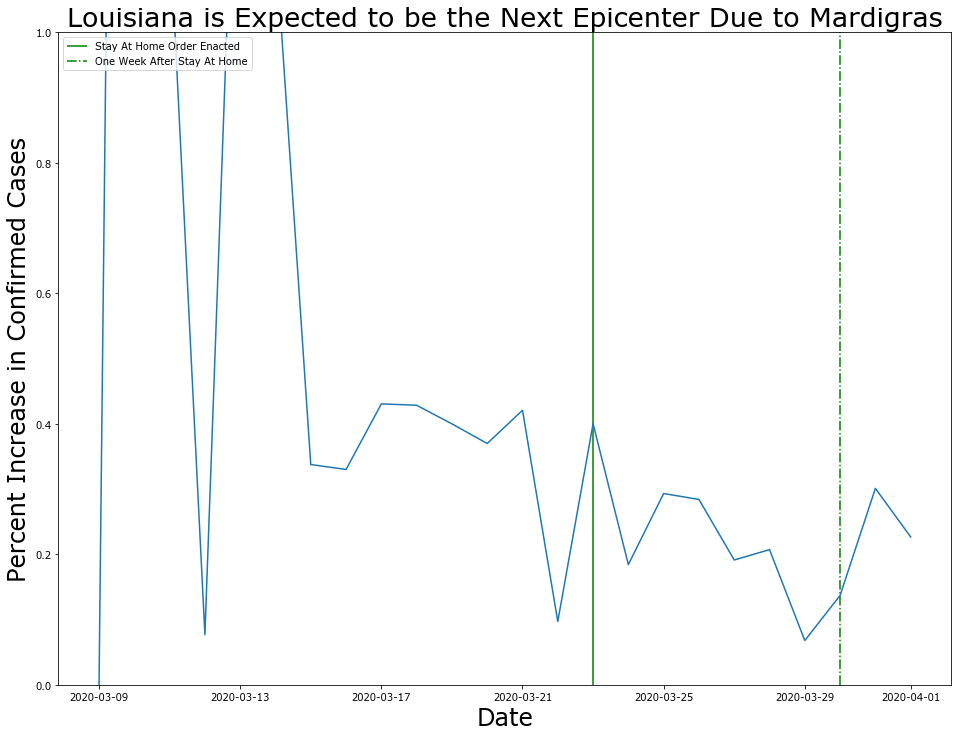

In [20]:
plt.figure(figsize=(16,12))
plt.title("Louisiana is Expected to be the Next Epicenter Due to Mardigras", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://twitter.com/LouisianaGov/status/1241806286699859971?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1241806286699859971&ref_url=https%3A%2F%2Fwww.cnn.com%2F2020%2F03%2F23%2Fus%2Fcoronavirus-which-states-stay-at-home-order-trnd%2Findex.html
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(louisiana_data.percent_change)

plt.legend(loc='upper left');

### Florida

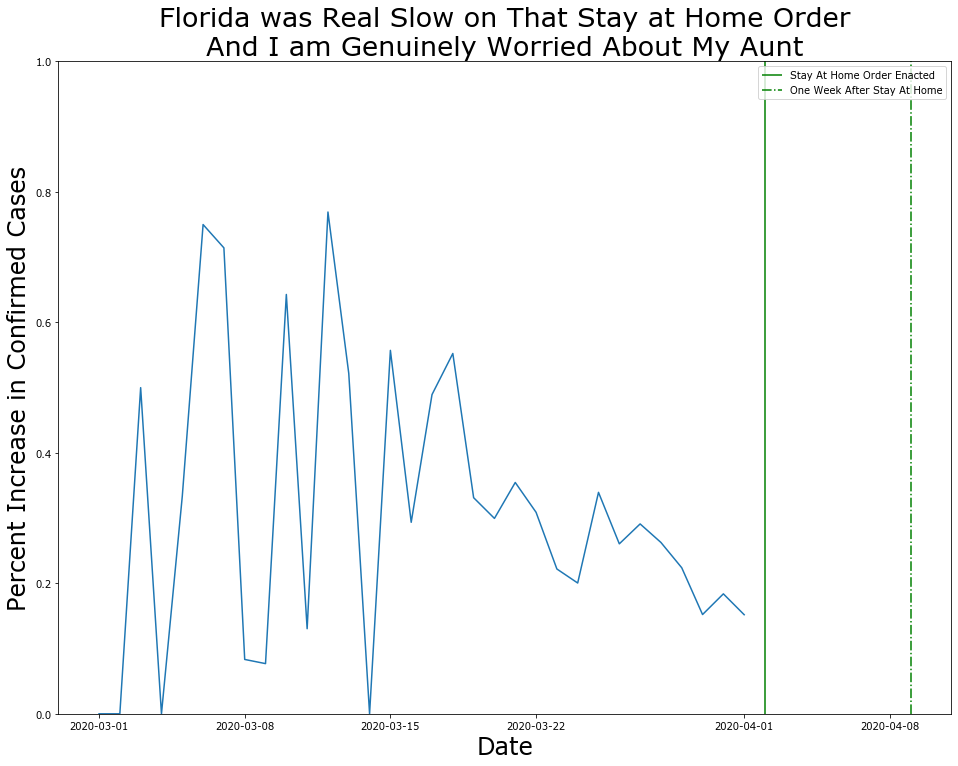

In [21]:
plt.figure(figsize=(16,12))
plt.title("Florida was Real Slow on That Stay at Home Order\nAnd I am Genuinely Worried About My Aunt", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.reuters.com/video/watch/idOVC7O1IOV
plt.vlines(x=dt.date(2020, 4, 2), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 4, 9), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(florida_data.percent_change)

plt.legend();

### New York

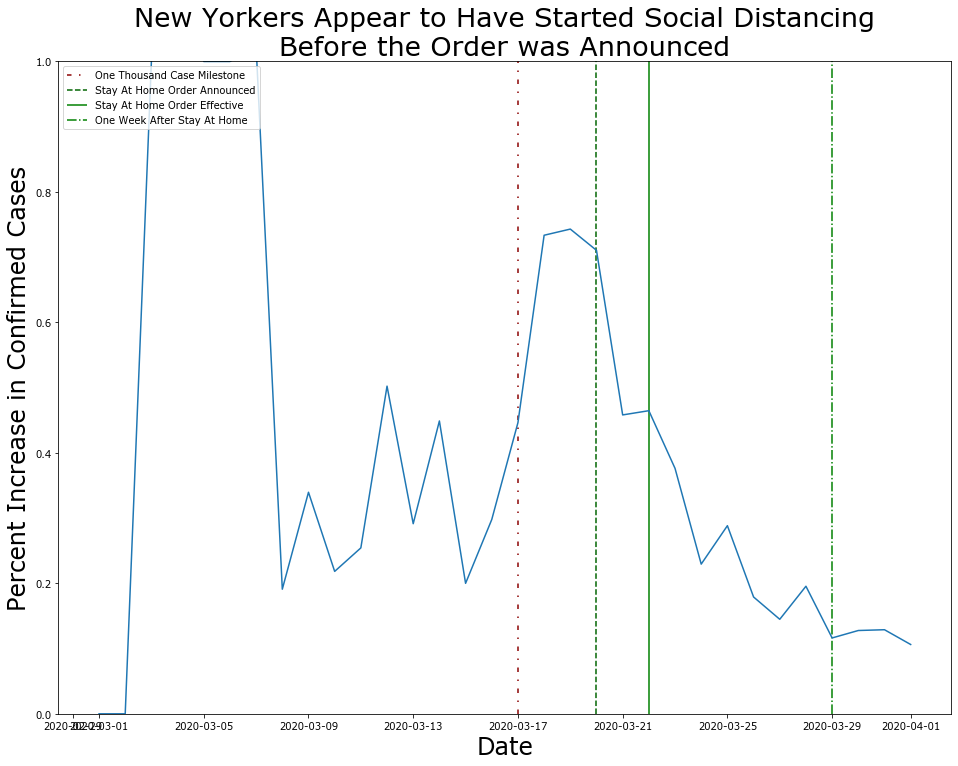

In [22]:
plt.figure(figsize=(16,12))
plt.title("New Yorkers Appear to Have Started Social Distancing\nBefore the Order was Announced", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

plt.vlines(x=thousand_case_milestone(new_york_data), ymin=0, ymax=1)
# https://www.npr.org/sections/coronavirus-live-updates/2020/03/20/818952589/coronavirus-n-y-gov-cuomo-says-100-of-workforce-must-stay-home
plt.vlines(x=dt.date(2020, 3, 20), ymin=0, ymax=1, linestyle='dashed', color='darkgreen', label='Stay At Home Order Announced')
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 3, 29), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(new_york_data.percent_change)

plt.legend(loc='upper left');

### Ohio

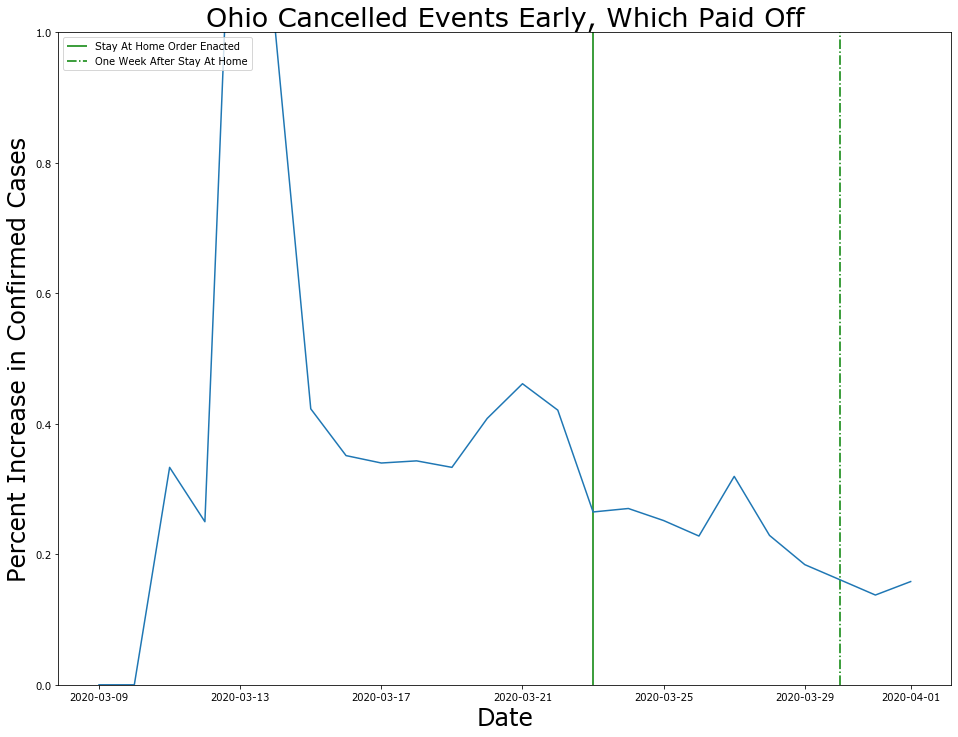

In [23]:
plt.figure(figsize=(16,12))
plt.title("Ohio Cancelled Events Early, Which Paid Off", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://www.littler.com/publication-press/publication/ohio-stay-home-order-effective-march-23-what-it-means-employers
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(ohio_data.percent_change)

plt.legend(loc='upper left');

### Utah

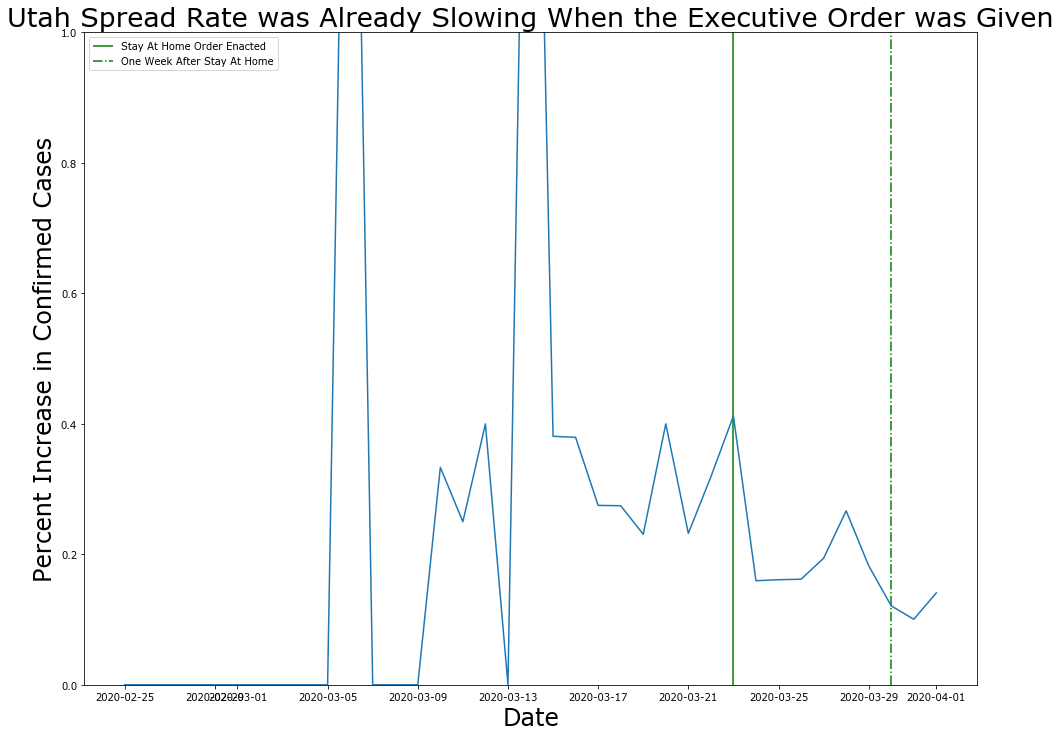

In [24]:
plt.figure(figsize=(16,12))
plt.title("Utah Spread Rate was Already Slowing When the Executive Order was Given", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://govstatus.egov.com/or-covid-19
plt.vlines(x=dt.date(2020, 3, 23), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Enacted')
plt.vlines(x=dt.date(2020, 3, 30), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(utah_data.percent_change)

plt.legend(loc='upper left');

### Kentucky

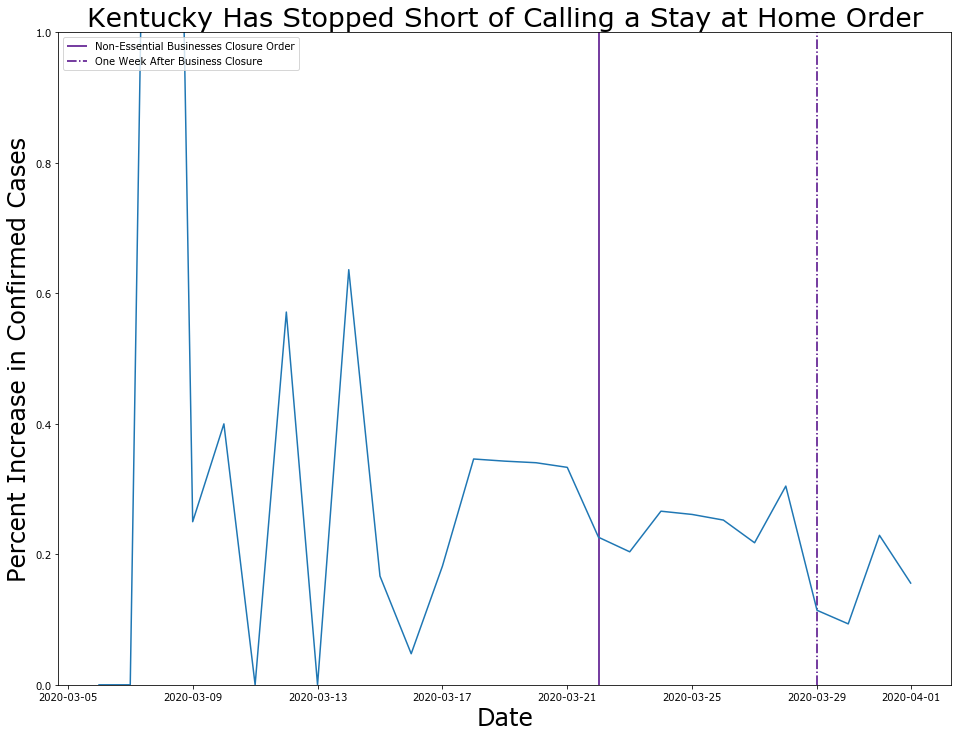

In [25]:
plt.figure(figsize=(16,12))
plt.title("Kentucky Has Stopped Short of Calling a Stay at Home Order", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

# https://kentucky.gov/Pages/Activity-stream.aspx?n=GovernorBeshear&prId=101
plt.vlines(x=dt.date(2020, 3, 22), ymin=0, ymax=1, linestyles='solid', color='indigo', label='Non-Essential Businesses Closure Order')
plt.vlines(x=dt.date(2020, 3, 29), ymin=0, ymax=1, linestyle='dashdot', color='indigo', label='One Week After Business Closure')

plt.ylim(ymin=0, ymax=1)

plt.plot(kentucky_data.percent_change)

plt.legend(loc='upper left');

### Alabama

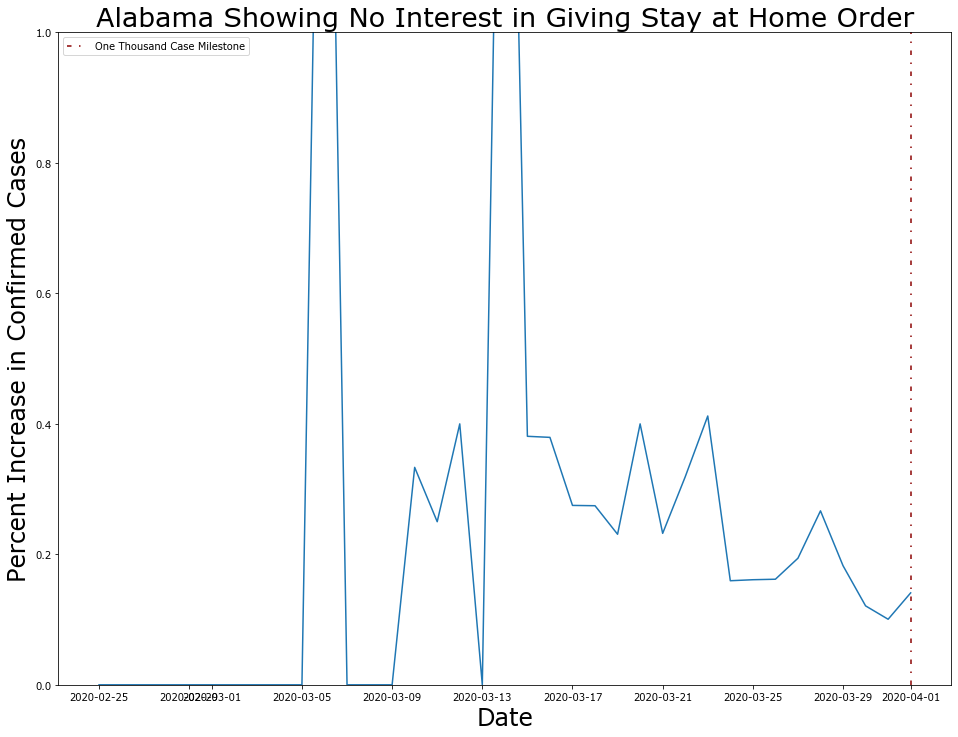

In [27]:
plt.figure(figsize=(16,12))
# https://www.dothanfirst.com/life-health/coronavirus/governors-office-holds-back-on-stay-at-home-order-for-alabama/
plt.title("Alabama Showing No Interest in Giving Stay at Home Order", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

thousand_case_milestone(alabama_data)

plt.ylim(ymin=0, ymax=1)

plt.plot(utah_data.percent_change)

plt.legend(loc='upper left');

### Minnesota

In [ ]:
plt.figure(figsize=(16,12))
plt.title("Minnesota Has Not Reached 1000 Cases as of April 1st", size=27)

plt.xlabel('Date', size=24)
plt.ylabel('Percent Increase in Confirmed Cases', size=24)

thousand_case_milestone(minnesota_data)
# https://twitter.com/GovTimWalz/status/1242896254839017472?ref_src=twsrc%5Etfw%7Ctwcamp%5Etweetembed%7Ctwterm%5E1242896254839017472&ref_url=https%3A%2F%2Fwww.cnn.com%2F2020%2F03%2F23%2Fus%2Fcoronavirus-which-states-stay-at-home-order-trnd%2Findex.html
plt.vlines(x=dt.date(2020, 3, 25), ymin=0, ymax=1, linestyle='dashed', color='darkgreen', label='Stay At Home Order Announced')
plt.vlines(x=dt.date(2020, 3, 27), ymin=0, ymax=1, linestyles='solid', color='green', label='Stay At Home Order Effective')
plt.vlines(x=dt.date(2020, 4, 3), ymin=0, ymax=1, linestyle='dashdot', color='green', label='One Week After Stay At Home')

plt.ylim(ymin=0, ymax=1)

plt.plot(minnesota_data.percent_change)

plt.legend(loc='upper left');

In [ ]:
massachusetts_data[massachusetts_data.cases>1000]

In [ ]:
total_us_data.state.unique()